- Name: Muhammad Rizki Achirlita
- LinkedIn: [Muhammad Rizki Achirlita](https://www.linkedin.com/in/rizkiachr/)
- Gmail: muh.rizkiachirlita@gmail.com


# LOAD DATASET

In [1]:
## Basic Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Dataset/Clicked Ads Dataset.csv')
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
819,79.60,39,513745960.0,194.23,Perempuan,04/22/2016 7:48,No,Balikpapan,Kalimantan Timur,Travel
934,78.41,33,387580690.0,248.23,Laki-Laki,06/03/2016 4:51,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Travel
565,79.97,26,432235860.0,185.45,Laki-Laki,01/08/2016 19:38,No,Medan,Sumatra Utara,Bank
176,60.72,44,300970600.0,105.69,Perempuan,02/28/2016 18:52,Yes,Medan,Sumatra Utara,Otomotif
28,70.20,34,228962580.0,119.20,Perempuan,04/14/2016 5:08,Yes,Pontianak,Kalimantan Barat,House


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [4]:
df.shape

(1000, 10)

# EXPLORATORY DATA ANALYSIS

## Cleaning

In [5]:
def cleaning(df):
    '''Tujuan dari fungsi ini adalah mengetahui kondisi tipe data, unique values, dan null'''
    try:
        import pandas as pd
        variables = pd.DataFrame(columns=['Variabel', 'Tipe Data', 'Jumlah Value Unik', 'Jumlah Value Unik (%)',
                                         'Jumlah Null', 'Jumlah Null (%)', 'Value'])
        for i, var in enumerate(df.columns):
            variables.loc[i] = [var, df[var].dtypes, df[var].nunique(), round(df[var].nunique()/df.shape[0]*100, 2),
                                df[var].isnull().sum(), round(df[var].isnull().sum()/df.shape[0]*100, 2), df[var].unique()]
        return (variables.set_index('Variabel'))
    except:
        print('Input tidak sesuai')
        
cleaning(df).sort_values(by='Jumlah Null (%)', ascending=False)

,Tipe Data,Jumlah Value Unik,Jumlah Value Unik (%),Jumlah Null,Jumlah Null (%),Value
Variabel,,,,,,
Daily Time Spent on Site,float64,890,89.0,13,1.3,"[68.95, 80.23, 69.47, 74.15, 68.37, 59.99, 88...."
Area Income,float64,987,98.7,13,1.3,"[432837300.0, 479092950.0, 418501580.0, 383643..."
Daily Internet Usage,float64,955,95.5,11,1.1,"[256.09, 193.77, 236.5, 245.89, 225.58, 226.74..."
Male,object,2,0.2,3,0.3,"[Perempuan, Laki-Laki, nan]"
Age,int64,43,4.3,0,0.0,"[35, 31, 26, 29, 23, 33, 48, 30, 20, 49, 37, 2..."
Timestamp,object,997,99.7,0,0.0,"[03/27/2016 0:53, 04/04/2016 1:39, 03/13/2016 ..."
Clicked on Ad,object,2,0.2,0,0.0,"[No, Yes]"
city,object,30,3.0,0,0.0,"[Jakarta Timur, Denpasar, Surabaya, Batam, Med..."
province,object,16,1.6,0,0.0,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Tim..."


- `Clicked on Ad` akan menjadi target 	
- Total Null tergolong kecil, hanya 40 dari 1000
- Kolom non-numerk yang memiliki kardinalitas tinggi `Timestamp` dan `city`. Untuk kolom `Timestamp` akan dilakukan feature engineering menjadi format bulan saja, karena data tersebut hanya berisi di tahun 2016. Sementara itu, kolom `city` akan dihapus karena sudah diwakili oleh `province`

In [6]:
## Feature Engineering
df['Month']= pd.to_datetime(df['Timestamp']).dt.month 
df.drop(columns=['city', 'Timestamp'], inplace=True)
df['province']= df['province'].replace({'Daerah Khusus Ibukota Jakarta': 'Jakarta'})
df['Clicked on Ad']= df['Clicked on Ad'].replace({'Yes': 1, 'No':0})

In [7]:
## Periksa data duplicate
df.duplicated().any()

False

In [8]:
df.shape

(1000, 9)

## Statistik Deskriptif

In [9]:
# Kolom kategori
df.describe(include='object').T

,count,unique,top,freq
Male,997,2,Perempuan,518
province,1000,16,Jakarta,253
category,1000,10,Otomotif,112


In [10]:
# Kolom numerik
df.describe(include=['float', 'int']).T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02
Clicked on Ad,1000.0,5.000000e-01,5.002502e-01,0.00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
Month,1000.0,3.817000e+00,1.926973e+00,1.00,2.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00


## Univariate Analysis

In [11]:
cats= ['Male', 'Clicked on Ad', 'category', 'Month', 'province']
nums= ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

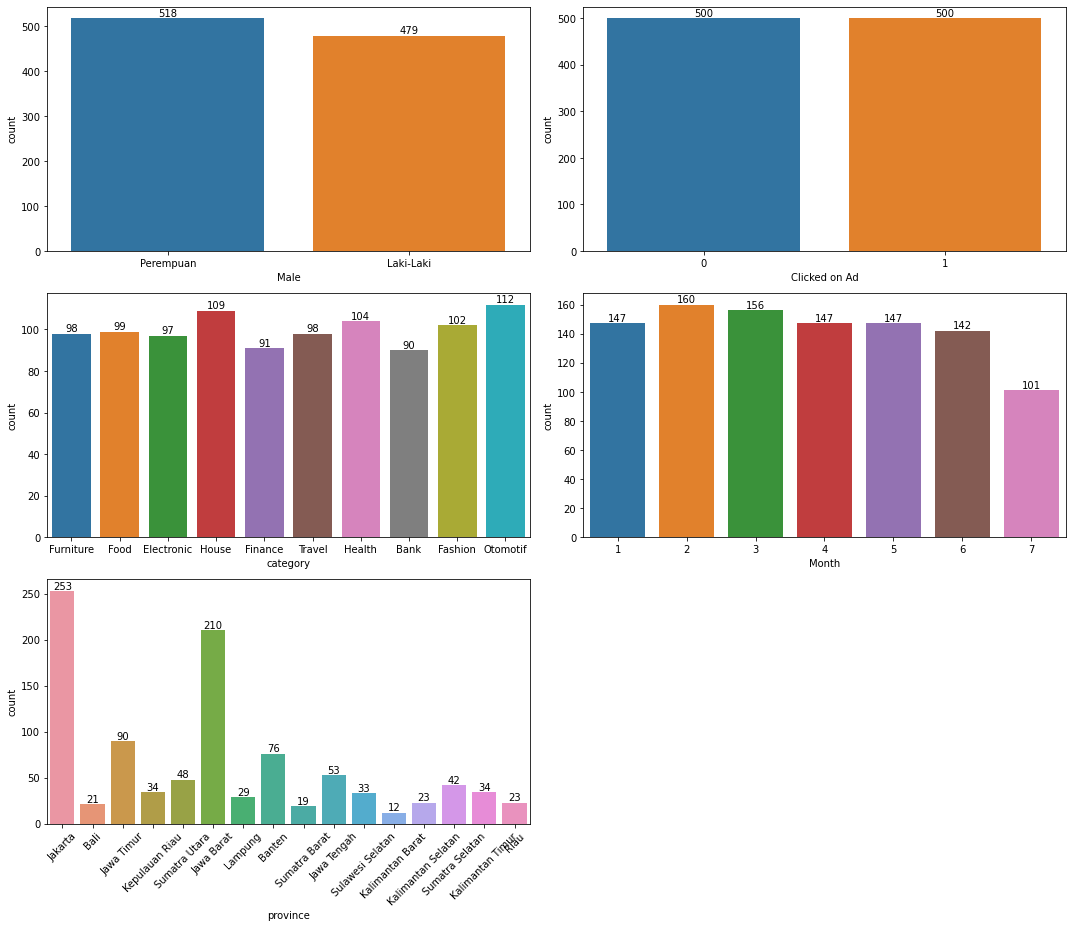

In [12]:
plt.figure(figsize=(15,13))
for a, b in enumerate(cats):
        plt.subplot(3, 2, a+1)
        ax= sns.countplot(x=df[b])
        ax.bar_label(ax.containers[0])
        if b in'province':
            plt.xticks(rotation=45)
plt.tight_layout();

plt.savefig('Pict/Countplot.png', dpi=150)

Tidak terdapat irrational value ataupun imbalance class pada target

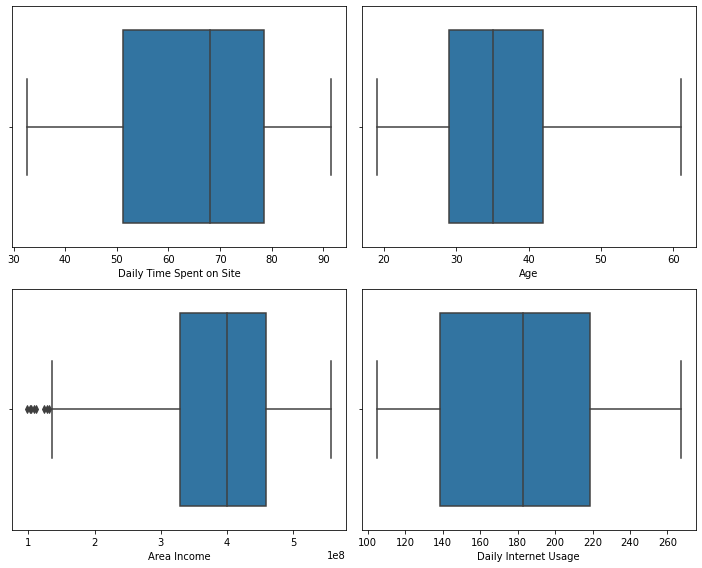

In [13]:
plt.figure(figsize=(10,8))
for b in range(0, len(nums)):
        plt.subplot(2,2,b+1)
        sns.boxplot(x=df[nums[b]])
plt.tight_layout();

plt.savefig('Pict/Boxplot.png', dpi=150)

In [14]:
for c in nums:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3-q1
    lowlimit = q1 - (iqr *1.5)
    highlimit = q3 + (iqr*1.5)
    
    outliers= df[(df[c]< lowlimit) | (df[c]>highlimit)].shape[0]
    if outliers> 0:
        print(f'Jumlah outliers di kolom {c} sebanyak {outliers}')

Jumlah outliers di kolom Area Income sebanyak 8


Terdapat outliers di kolom `Area Income` sebanyak 8. Karena jumlah outliers terbilang kecil, maka saya memutuskan untuk menghapusnya pada saat preprocessing.

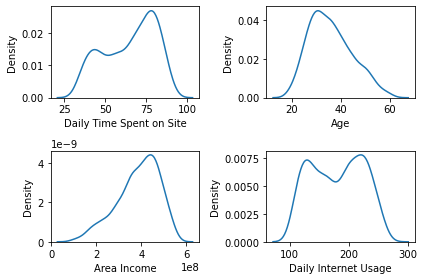

In [15]:
for d in range(0, len(nums)):
    plt.subplot(2, 2, d+1)
    sns.kdeplot(x=df[nums[d]])
plt.tight_layout()

plt.savefig('Pict/Kdeplot.png', dpi=150)

Terdapat isu skew hanya saja sangat kecil, sehingga kita dapat mengabaikannya

## Bivariate Analysis

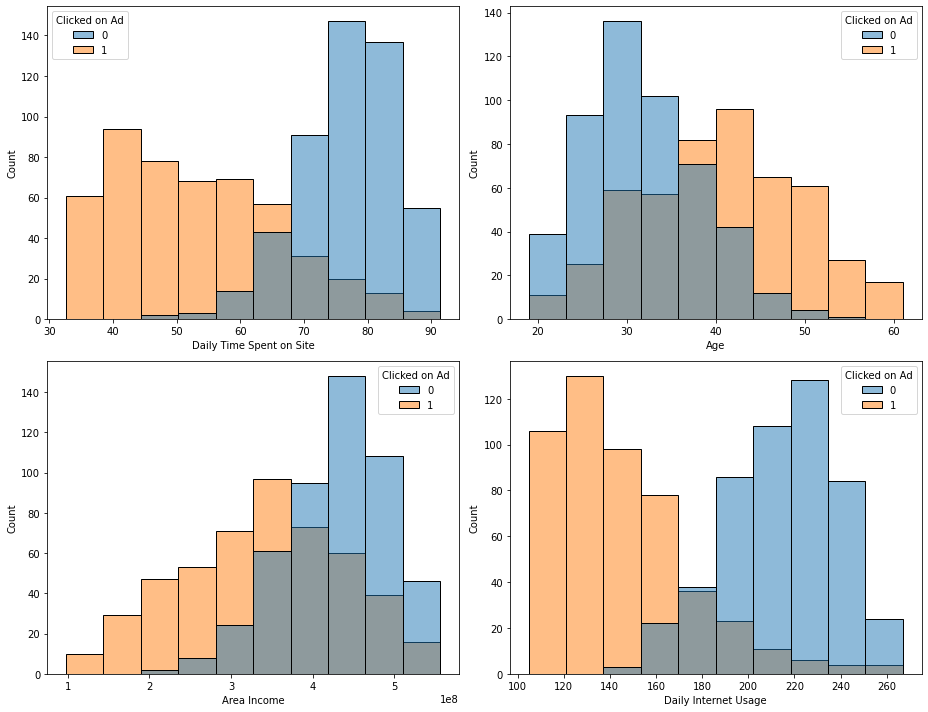

In [16]:
plt.figure(figsize=(13,10))
for e, f in enumerate(nums):
    plt.subplot(2, 2, e+1)
    ax= sns.histplot(x=f, data=df, hue='Clicked on Ad', bins=10)
plt.tight_layout()

plt.savefig('Pict/Histplot.png', dpi=150)

Sejauh yang terlihat, sebaran kolom numerik yang klik ads dan tidak hasilnya sama. Hal tersebut karena, sebaran nilai yang mengklik iklan dan tidak adalah sama persis, yaitu 50:50. Meski begitu, terlihat ada beberapa kecenderungan berikut:
- Semakin tinggi daily time spent on site, maka kecenderungan customer tersebut tidak mengklik ads
- Semakin tua seorang customer, maka kecenderungan untuk mengklik ads semakin tinggi

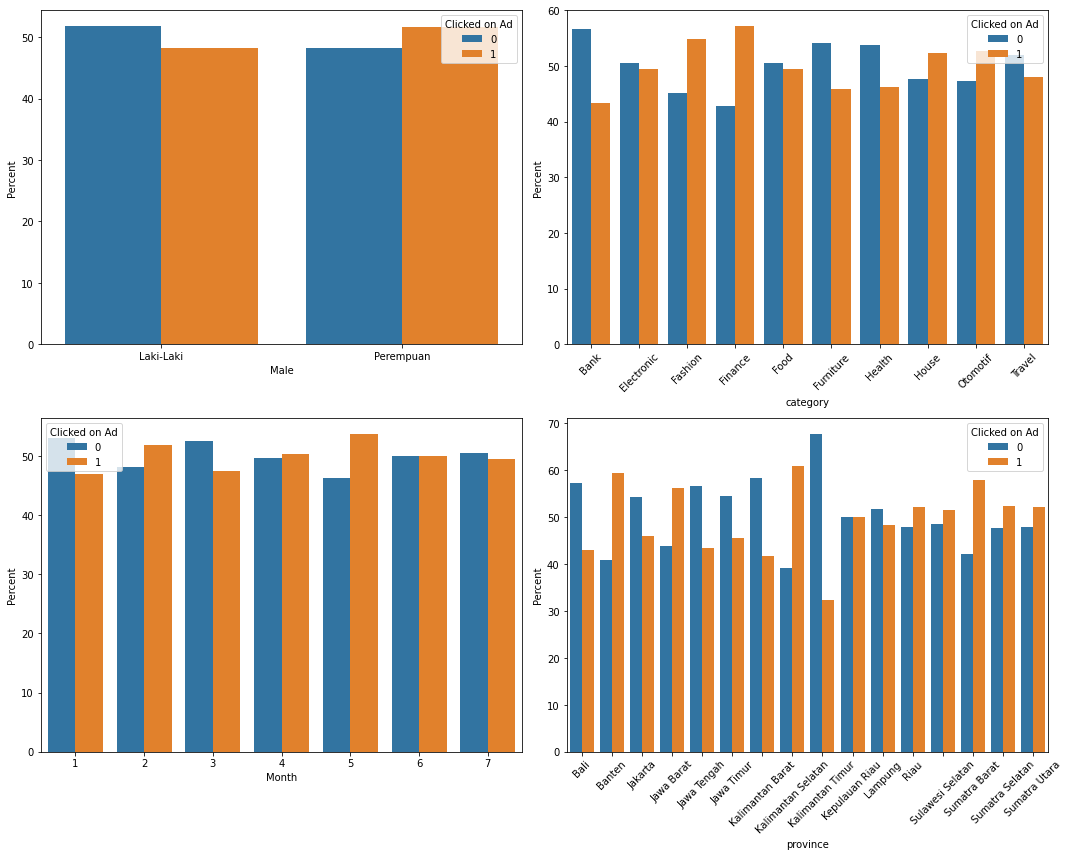

In [17]:
kat= ['Male', 'category', 'Month', 'province']
plt.figure(figsize=(15,12))
for g, h in enumerate(kat):
    plt.subplot(2, 2, g+1)
    normal = df.groupby(h)['Clicked on Ad'].value_counts(normalize=True).multiply(100).rename('Percent').reset_index()
    sns.barplot(data=normal, x=h, y='Percent', hue='Clicked on Ad')
    
    if h in ['category', 'province']:
        plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('Pict/Barplot.png', dpi=150)    

Tidak ada value yang benar-benar mendominasi telak, sehingga belum dapat disimpulkan

## Multivariate Analysis

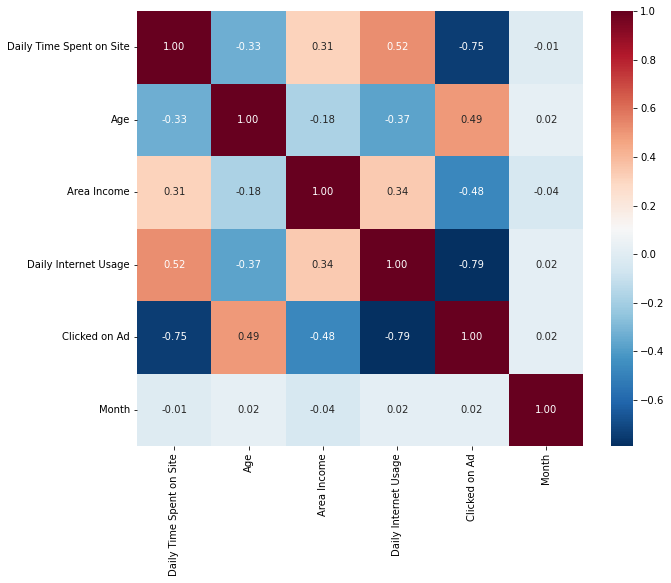

In [18]:
plt.figure(figsize=(10,8))                
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu_r')

plt.savefig('Pict/Heatmap.png', dpi=150);

Data numerik terbebas dari gejala multikolinearitas dan semua kolom memiliki korelasi yang kuat, kecuali kolom `Month`.

# DATA PREPROCESSING

## Handle null dan outliers

In [19]:
## Handle null
df.dropna(axis=0, inplace=True)

## Handle outliers
q1 = df['Area Income'].quantile(0.25)
q3 = df['Area Income'].quantile(0.75)
iqr = q3-q1
lowlimit = q1 - (iqr *1.5)
highlimit = q3 + (iqr*1.5)
filtering= ((df['Area Income']>= lowlimit) & (df['Area Income']<=highlimit))
df= df[filtering]

In [20]:
df.shape

(955, 9)

## Feature Encoding

In [21]:
df.select_dtypes('object').head(5)

,Male,province,category
0,Perempuan,Jakarta,Furniture
1,Laki-Laki,Bali,Food
2,Perempuan,Jawa Timur,Electronic
3,Laki-Laki,Kepulauan Riau,House
4,Perempuan,Sumatra Utara,Finance


In [22]:
## Label Encoding
df['Male']= df['Male'].replace({'Perempuan': 0, 'Laki-Laki':1})

In [23]:
## One Hot Encoding
col= ['province', 'category']
for i in col:
    ohe= pd.get_dummies(df[i], prefix=i)
    df= pd.concat([df, ohe], axis=1)
    df.drop(columns=i, inplace=True)

In [24]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,province_Bali,province_Banten,province_Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
0,68.95,35,432837300.0,256.09,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.23,31,479092950.0,193.77,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,69.47,26,418501580.0,236.50,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,74.15,29,383643260.0,245.89,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,68.37,35,517229930.0,225.58,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


## Splitting Dataset

In [25]:
from sklearn.model_selection import train_test_split

X= df.drop(columns='Clicked on Ad')
y= df['Clicked on Ad']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((764, 32), (191, 32), (764,), (191,))

In [26]:
train= pd.concat([X_train, y_train], axis=1)
test= pd.concat([X_test, y_test], axis=1)

In [27]:
train.shape, test.shape

((764, 33), (191, 33))

### Feature Scalling

In [28]:
from sklearn.preprocessing import StandardScaler

for i in train.select_dtypes('number').columns:
        scaler = StandardScaler().fit(train[[i]])
        train[i] = scaler.transform(train[[i]])
        test[i] = scaler.transform(test[[i]])

Kita akan membuat dua skenario untuk mendapat hasil terbaik. Skenario pertama, kita akan melakukan modeling tanpa melakukan scaling, dan skenario kedua melakukan modeling dengan feature scaling standard scaler.

In [29]:
## Skenario 1 (Tanpa scalling)
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,province_Bali,province_Banten,province_Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
96,45.72,36,157311560.0,154.02,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
754,76.87,36,510641320.0,212.59,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
102,89.91,40,417154920.0,194.23,0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
238,74.32,33,434420770.0,128.17,0,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
407,48.73,27,239338610.0,142.04,0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [30]:
## Skenario 2 (Dengan Scalling)
X_train_scal= train.drop(columns='Clicked on Ad')
y_train_scal= train['Clicked on Ad']
X_test_scal= test.drop(columns= 'Clicked on Ad')
y_test_scal= test['Clicked on Ad']

X_train_scal.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,province_Bali,province_Banten,province_Jakarta,province_Jawa Barat,province_Jawa Tengah,province_Jawa Timur,province_Kalimantan Barat,province_Kalimantan Selatan,province_Kalimantan Timur,province_Kepulauan Riau,province_Lampung,province_Riau,province_Sulawesi Selatan,province_Sumatra Barat,province_Sumatra Selatan,province_Sumatra Utara,category_Bank,category_Electronic,category_Fashion,category_Finance,category_Food,category_Furniture,category_Health,category_House,category_Otomotif,category_Travel
96,-1.207338,0.005337,-2.551231,-0.590625,1.081875,0.080083,-0.141516,3.662662,-0.561226,-0.524842,-0.247207,-0.332363,-0.109181,-0.159698,-0.198635,-0.191403,-0.159698,-0.141516,-0.18009,-0.141516,-0.21247,-0.228783,-0.325029,-0.334786,-0.325029,-0.307499,-0.332363,-0.332363,-0.344375,-0.344375,-0.35848,3.053576
754,0.748194,0.005337,1.346263,0.753271,-0.924321,1.635594,-0.141516,-0.273025,-0.561226,-0.524842,-0.247207,3.008759,-0.109181,-0.159698,-0.198635,-0.191403,-0.159698,-0.141516,-0.18009,-0.141516,-0.21247,-0.228783,-0.325029,2.986985,-0.325029,-0.307499,-0.332363,-0.332363,-0.344375,-0.344375,-0.35848,-0.327485
102,1.566818,0.458376,0.315037,0.331998,-0.924321,1.635594,-0.141516,3.662662,-0.561226,-0.524842,-0.247207,-0.332363,-0.109181,-0.159698,-0.198635,-0.191403,-0.159698,-0.141516,-0.18009,-0.141516,-0.21247,-0.228783,-0.325029,-0.334786,-0.325029,-0.307499,-0.332363,-0.332363,-0.344375,-0.344375,-0.35848,3.053576
238,0.588111,-0.334442,0.505493,-1.183757,-0.924321,0.598587,-0.141516,-0.273025,1.781815,-0.524842,-0.247207,-0.332363,-0.109181,-0.159698,-0.198635,-0.191403,-0.159698,-0.141516,-0.18009,-0.141516,-0.21247,-0.228783,-0.325029,-0.334786,-0.325029,3.252039,-0.332363,-0.332363,-0.344375,-0.344375,-0.35848,-0.327485
407,-1.018376,-1.014001,-1.646411,-0.865508,-0.924321,1.635594,-0.141516,-0.273025,1.781815,-0.524842,-0.247207,-0.332363,-0.109181,-0.159698,-0.198635,-0.191403,-0.159698,-0.141516,-0.18009,-0.141516,-0.21247,-0.228783,-0.325029,-0.334786,-0.325029,-0.307499,-0.332363,3.008759,-0.344375,-0.344375,-0.35848,-0.327485


# MODELING - CLASSIFICATION

In [31]:
## Packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

In [32]:
def evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    acuracy=accuracy_score(ytest, pred)
    precision = precision_score(ytest, pred)
    recall = recall_score(ytest, pred)
    f1 = f1_score(ytest, pred)

    print("Accuracy (Train Set): %.2f" % model.score(xtrain, ytrain))
    print("Accuracy (Test Set): %.2f" % acuracy)
    print("\nPrecision (Test Set): %.2f" % precision)
    print("Recall (Test Set): %.2f" % recall)
    print("F1-Score (Test Set): %.2f" % f1)

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print("AUC: %.2f" % roc_auc)

    return acuracy, precision, recall, f1, roc_auc
metrics,accuracy,precision,recall,f1,roc_auc = [],[],[],[],[],[]

def evaluate_prediction(y_test, y_pred):

  # Calculate model accuracy
  model_accuracy = accuracy_score(y_test, y_pred) * 100

  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
  model_evaluation = {"accuracy": model_accuracy,
                      "precision": model_precision,
                      "recall": model_recall,
                      "f1": model_f1}
  return model_evaluation

## Logistic Regression

In [33]:
## Skenario 1 (Tanpa scalling)
logreg = LogisticRegression()
lr1= logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

eval = evaluation(logreg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.50
Accuracy (Test Set): 0.50

Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
AUC: 0.50


In [51]:
## Skenario 2 (Dengan scalling)
logreg = LogisticRegression()
lr2= logreg.fit(X_train_scal, y_train_scal)
y_pred_scal = logreg.predict(X_test_scal)

eval_lr = evaluation(logreg, y_pred_scal, X_train_scal, y_train_scal, X_test_scal, y_test_scal)

Accuracy (Train Set): 0.97
Accuracy (Test Set): 0.96

Precision (Test Set): 0.94
Recall (Test Set): 0.98
F1-Score (Test Set): 0.96
AUC: 0.96


In [54]:
eval_logreg= evaluate_prediction(y_test_scal, y_pred_scal)

## KNN

In [55]:
## Skenario 1 (Tanpa scalling)
knn = KNeighborsClassifier()
knn1= knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

eval = evaluation(knn, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.76
Accuracy (Test Set): 0.68

Precision (Test Set): 0.70
Recall (Test Set): 0.62
F1-Score (Test Set): 0.66
AUC: 0.68


In [56]:
## Skenario 2 (Dengan scalling)
knn = KNeighborsClassifier()
knn2= knn.fit(X_train_scal, y_train_scal)
y_pred_scal = knn.predict(X_test_scal)

evalknn = evaluation(knn, y_pred_scal, X_train_scal, y_train_scal, X_test_scal, y_test_scal)

Accuracy (Train Set): 0.91
Accuracy (Test Set): 0.86

Precision (Test Set): 0.88
Recall (Test Set): 0.84
F1-Score (Test Set): 0.86
AUC: 0.86


In [57]:
eval_knn= evaluate_prediction(y_test_scal, y_pred_scal)

## Random Forest

In [62]:
## Skenario 1
rfc = RandomForestClassifier(max_depth=4, random_state=32)
rfc1= rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
eval= evaluation(rfc, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.97

Precision (Test Set): 0.96
Recall (Test Set): 0.98
F1-Score (Test Set): 0.97
AUC: 0.97


In [63]:
## Skenario 2
rfc.fit(X_train_scal, y_train_scal)
y_pred_scal= rfc.predict(X_test_scal)
evalrf= evaluation(rfc, y_pred_scal, X_train_scal, y_train_scal, X_test_scal, y_test_scal)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.97

Precision (Test Set): 0.96
Recall (Test Set): 0.98
F1-Score (Test Set): 0.97
AUC: 0.97


In [64]:
eval_rf= evaluate_prediction(y_test_scal, y_pred_scal)

## Compare Results

In [65]:
model_evaluations = pd.DataFrame({"Logistic": eval_logreg,
                                  "Knn": eval_knn,
                                  "Random Forest":eval_rf}).T
model_evaluations

,accuracy,precision,recall,f1
Logistic,95.811518,0.958929,0.958115,0.958101
Knn,86.387435,0.864484,0.863874,0.863800
Random Forest,96.858639,0.968795,0.968586,0.968585


Tujuan pembuatan model ini adalah untuk mempelajari 'kriteria' visitor yang akan mengklik iklan atau tidak, sehingga tidak ada kepentingan antar label dan dataset yang balance. Maka, metrics yang digunakan adalah **accuracy**. Berdasarkan ketiga algoritma yang sudah digunakan, algoritma Random Forest (skenario 2) adalah yang memberikan hasil accurcay test terbesar. Sehingga, dalam model ini, saya akan memilih feature importance berdasarkan algoritma Random Forest.

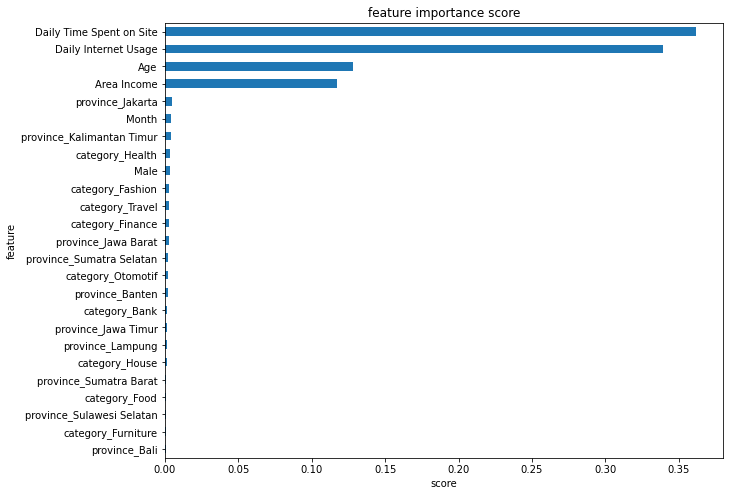

In [43]:
feat_importances= pd.Series(rfc.feature_importances_, index=X.columns)
ax= feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score');

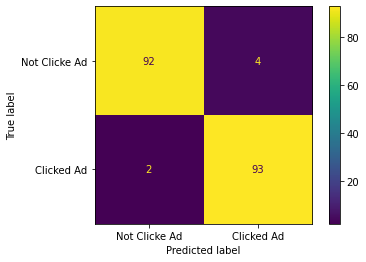

In [67]:
plot_confusion_matrix(rfc, X_test_scal, y_test_scal, 
                      values_format='d', display_labels=["Not Clicke Ad", "Clicked Ad"])

plt.savefig('Pict/Conf Matrix RF.png', dpi=150);

## Interpretasi

Berdasarkan pemodelan yang telah dilakukan, Random Forest menyatakan beberapa feature terpenting yang sangat mempengaruhi model. Berikut 4 terbesar diantaranya:
- Daily internet usage
- Daily time spent on site
- Age
- Area Income

Sehingga, sebagai user dalam bisnis dapat menggunakan parameter utama tersebut dalam melakukan sasaran ads.

# Simulasi Bisnis

In [45]:
## Data test
y_test.shape

(191,)

### 1. Tanpa Machine Learning

Kita memiliki sampel test sebanyak 191 user. Apabila strategi ads ini dilakukan tanpa machine learning (seperti dataset ini), maka:
1. Kita akan menggunakan budget 2000*191 = Rp 382.000 untuk melakukan ads
2. Total cost ads = Rp 382.000
3. Convertion rate (iklan)= 50% atau 96 user (sesuai data awal di dataset ini)
4. **Cost ads per customer sebesar Rp 382.000/96 = Rp 3979/per customer**

### 2. Dengan Machine Learning

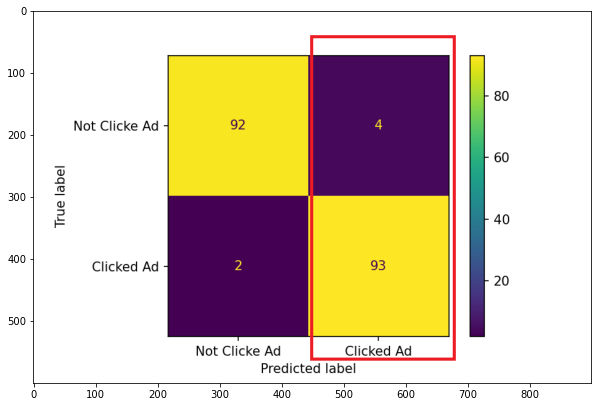

In [69]:
plt.figure(figsize=(10,8))
img= mpimg.imread('Pict/conf matrix.png')
plt.imshow(img);

Kita hanya akan melakukan ads hanya pada user yang kita prediksi akan mengklik iklan, maka:
1. kita akan berfokus pada 97 user tersebut, sehingga 2000*97= Rp 194.000
2. Total cost ads = Rp 194.000
3. Convertion rate (iklan)= 95.87% atau 93 dari 97 user
4. **Cost ads per customer sebesar Rp 194.000/97 = Rp 2086 per customer**

### Kesimpulan

Melakukan advertising dengan menggunakan machine learning jauh lebih efisien, karena machine learning dengan algoritma-nya telah mempelajari user-user mana yang berpotensi mengklik iklan tersebut. Sehingga, jenis user yang menjadi sasaran iklan dapat teridentifikasi dengan baik lewat feature importance yang telah ditampilkan. Seperti contohnya pada kasus ini, dengan Machine Learning dapat meningkatkan convertion rate (iklan) dari yang awalnya hanya 50% menjadi 95.87%. Peningkatan efektivitas tersebut juga akan **me-reduce cost ads per customer hingga 47.57%!**

# Sekian~
Apabila ada yang ingin didiskusikan feel free to ask me on LinkedIn :)